> # **Building the Bag-Of-Words from Scratch**

> Step - 1 : import the libraries

In [133]:
import nltk
import re
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

> Step - 2 : Preprocess Text

In [134]:
from sklearn.utils.multiclass import type_of_target
text = "Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies. It discards the word order and captures the frequency of each word in the document, creating a vector representation."

data = nltk.sent_tokenize(text)

for i in range(len(data)):
  data[i] = data[i].lower()
  data[i] = re.sub(r'\W', ' ', data[i])

for i, sent in enumerate(data):
  print(f"sentence{i+1}: {sent}")

sentence1: bag of words  bow  is a text representation technique that represents a document as an unordered set of words and their respective frequencies 
sentence2: it discards the word order and captures the frequency of each word in the document  creating a vector representation 


> Step - 3 : Counting word frequency

In [135]:
word2count = {}

for data in data:
  words = nltk.word_tokenize(data)                 # Corrected function name
  for word in words:
    if word not in word2count:
      word2count[word] = 1
    else:
      word2count[word]+=1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}
print("filtered_word2count :", filtered_word2count)

word_freq = pd.DataFrame(list(filtered_word2count.items()), columns = ['word', 'frequency'])

word_freq_df = word_freq.sort_values(by = 'frequency', ascending=False)
word_freq_df.head(5)

filtered_word2count : {'bag': 1, 'words': 2, 'bow': 1, 'text': 1, 'representation': 2, 'technique': 1, 'represents': 1, 'document': 2, 'unordered': 1, 'set': 1, 'respective': 1, 'frequencies': 1, 'discards': 1, 'word': 2, 'order': 1, 'captures': 1, 'frequency': 1, 'creating': 1, 'vector': 1}


,word,frequency
1,words,2
7,document,2
4,representation,2
13,word,2
0,bag,1


> Step - 4 : Selecting the most_frequent words

['of', 'a', 'the', 'words', 'representation', 'document', 'and', 'word', 'bag', 'bow']


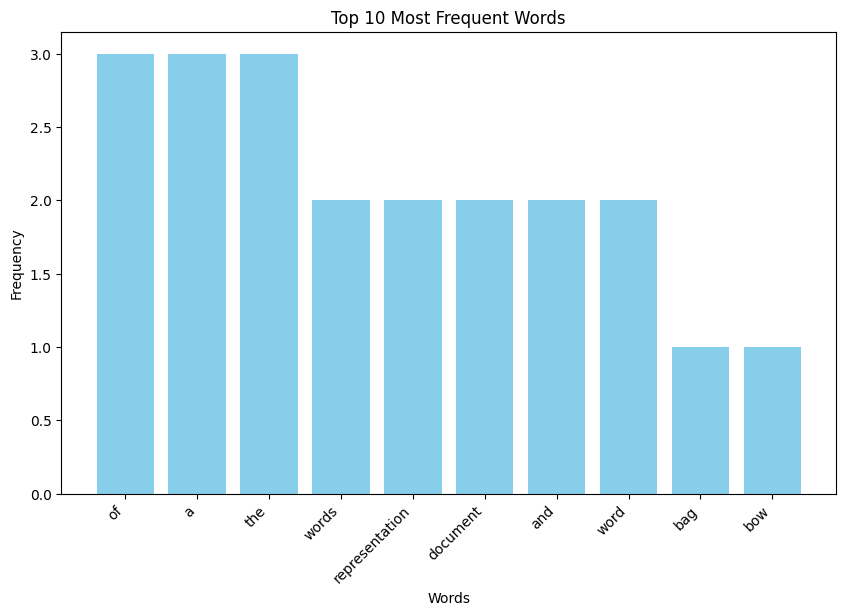

In [136]:
import heapq

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(freq_words)

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

> Step - 5 : Building the BOW model

In [150]:
x = []

for d in data:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(d):          # check inside current sentence
            vector.append(1)
        else:
            vector.append(0)
    x.append(vector)            # append after full vector is built

x = np.asarray(x)
print(x[:5])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


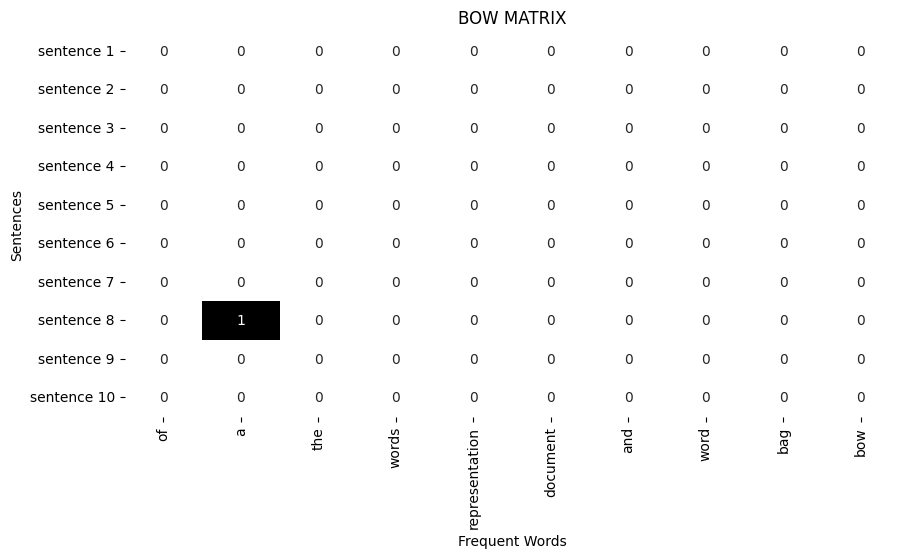

In [153]:
subset = x[:10]

plt.figure(figsize=(10,5))
sns.heatmap(
    subset,
    cmap="binary",
    cbar=False,
    annot=True,
    fmt="d",
    xticklabels=freq_words,
    yticklabels=[f"sentence {i+1}" for i in range(10)]
)

plt.title("BOW MATRIX")
plt.xlabel("Frequent Words")
plt.ylabel("Sentences")
plt.show()